## <strong>Momentos geométricos</strong>


El momento geométrico $M$ de orden $p+q$ expresado como $M_{pq}$, de una
función de distribución de intensidad en el plano real $f(x,y)$, está dado por:



\begin{equation}
M_{p q}=\sum_x \sum_y x^p y^q f(x, y)
\end{equation}

Los momento central normalizado $(p-q)$ se define como



\begin{equation}
\eta_{p q}=\frac{M_{p q}}{M_{00}^\beta}
\end{equation}

donde 


\begin{equation}
\beta=\frac{p+q}{2}+1  
\end{equation}
y
\begin{equation}
p+q \geq 2
\end{equation}



A partir de estos momentos centrales normalizados, es posible calcular siete cantidades derivadas atribuidas a Hu (también denominadas momentos de Hu) que son invariantes a la traslación, la escala y la rotación



<img src=momento-HU.jpg alt="Descripción de la imagen" width="800">

In [1]:
import cv2
import numpy as np
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import imutils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [3]:
m1= []
ejemplo_dir = r'C:\Users\Sebastian\OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM\Desktop\Cursos_vision artificial\Descriptor_momento de HU\modoos'  #direccion de la imagen
contenido = os.listdir(ejemplo_dir)
for fichero in contenido:
    if os.path.isfile(os.path.join(ejemplo_dir, fichero)) and fichero.endswith('.png'):  #Busca todos los ficheros que termian en .png
        m1.append(fichero) #Lo agrega a la lista
m1.sort()
momentos_hu = []
moments_trans = []

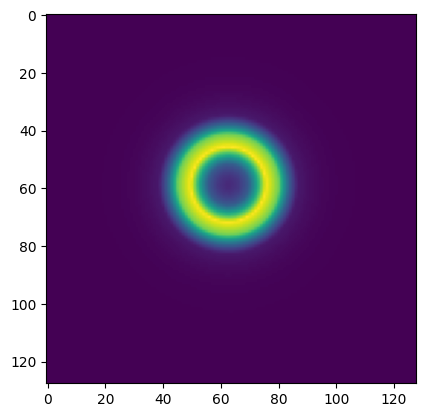

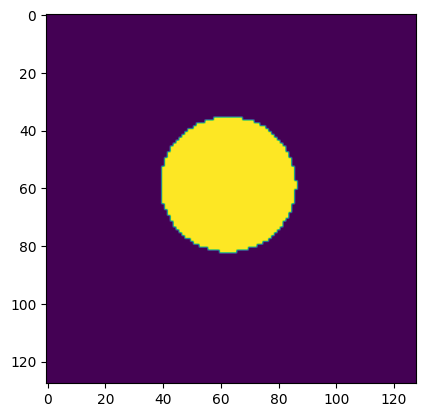

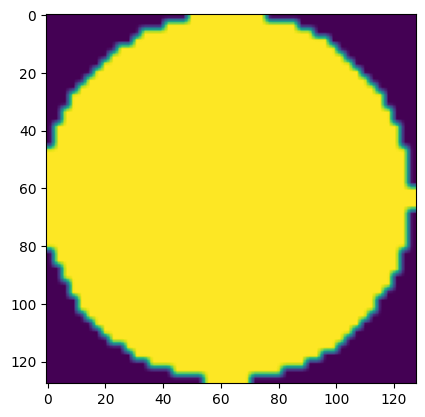

[ 6.24812725e-04  1.45697773e-12  8.40704823e-16  4.39965932e-18
  1.84346595e-34  1.44546119e-24 -1.93944062e-34]
[  3.20425013  11.83654709  15.07535646  17.35658095  33.73436488
  23.83999357 -33.71232351]


In [4]:
img=cv2.imread(ejemplo_dir+'/'+m1[3],0)

(h, w) = img.shape[:]
(cX, cY) = (w // 2, h // 2)
M2 = cv2.getRotationMatrix2D((cX, cY), 0, 1.0)
M = cv2.warpAffine(img, M2, (w, h))
plt.imshow(M)
plt.show()
ret, thresh = cv2.threshold(img,37,255,cv2.THRESH_BINARY)

#--- Extraer el contorno de la imagen.
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(contours)

contour = max(contours, key=cv2.contourArea)

plt.imshow(thresh)
plt.show()

#---- Obtenemos la región de interés correspondiente al contorno. -----#
x, y, width, height = cv2.boundingRect(contour)

roi = cv2.resize(thresh[y:y + height, x:x + width], (128, 128))

#calculamos el vector característico utilizando los momentos de Hu.
moments = cv2.HuMoments(cv2.moments(roi)).flatten()

hu = -1 * np.sign(moments) * np.log10(np.abs(moments))

plt.imshow(roi)
plt.show()

print(moments)
print(hu)

Tenga en cuenta que hu[1] no es comparable en magnitud a hu[7]. Podemos usar una transformación de registro que se proporciona a continuación para traerlos al mismo rango

\begin{equation}
H_i=-\operatorname{sign}\left(h_i\right) \log \left|h_i\right|
\end{equation}

In [5]:
for image_path in m1:

    # Cargamos la imagen y la convertimos en escala de grises.
    img=cv2.imread(ejemplo_dir+'/'+str(image_path),0)#Leer la imagen con openCV, y se carga en escala de grises

    ret, thresh = cv2.threshold(img,37,255,cv2.THRESH_BINARY)


    # Extraemos el contorno de la figura en la imagen.
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
  
    # Nos quedamos con el contorno de mayor área.
    contours = imutils.grab_contours(contours)
    contour = max(contours, key=cv2.contourArea)

    # Obtenemos la región de interés correspondiente al contorno.
    x, y, width, height = cv2.boundingRect(contour)
    roi = cv2.resize(thresh[y:y + height, x:x + width], (50, 50))

    #calculamos el vector característico utilizando los momentos de Hu.
    moments = cv2.HuMoments(cv2.moments(roi)).flatten()
    trans = -1 * np.sign(moments) * np.log10(np.abs(moments))
    
    # Agregamos el vector característico a la lista de datos.
    momentos_hu.append(moments) 
    moments_trans.append(trans)

momentos_hu = np.asarray(momentos_hu)
moments_trans = np.asarray(moments_trans)

#print(momentos)

In [6]:
print(momentos_hu[1])
print(moments_trans[1])

[ 6.50019039e-04  3.73069443e-10  6.61338339e-15  9.71995876e-17
  3.94313025e-32 -1.85774742e-21 -6.72187753e-32]
[  3.18707392   9.42821032  14.1795763   16.01233558  31.40415888
 -20.73101333 -31.1725094 ]


In [15]:
df=pd.DataFrame()   #Definimos un dataframe
df['layer'] = pd.read_excel(r"C:\Users\Sebastian\OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM\Desktop\Cursos_vision artificial\Descriptor_momento de HU\etiquetas.xlsx") #Leer el archivo de excel donde estan las etiquetas y gurdo en un dataframe

layer=df['layer']
layer.to_numpy().tolist() #luego la variable imagelayer la convierto en una lista
layer=layer.to_numpy() #Para que sea un arreglo de numpy( lo hago para en el siguente comando para usar el

In [16]:
X_train, X_test, y_train, y_test = train_test_split(moments_trans, layer, test_size=0.2, shuffle = True, random_state=1)

# this is the support vector classifier
svmModel = SVC(kernel='linear', probability=True, random_state=42)

# fit the model to the training data
svmModel.fit(X_train, y_train)
SVC(kernel='linear', probability=True, random_state=42)
# generate the predictions
y_pred = svmModel.predict(X_test)

In [17]:
# calculate the precision
precision = precision_score(y_test, y_pred)
print('Model precision is: ', precision)

Model precision is:  0.9615384615384616


In [18]:
predictions = svmModel.predict_proba(X_test)
print('Model predictions is: ', predictions)

Model predictions is:  [[9.89853921e-01 1.01460790e-02]
 [9.88489959e-01 1.15100413e-02]
 [2.22248364e-07 9.99999778e-01]
 [1.92746932e-08 9.99999981e-01]
 [1.66713227e-06 9.99998333e-01]
 [2.41472284e-02 9.75852772e-01]
 [1.44919835e-09 9.99999999e-01]
 [9.99723496e-01 2.76503875e-04]
 [4.32116288e-03 9.95678837e-01]
 [9.89807777e-01 1.01922228e-02]
 [9.98683711e-01 1.31628927e-03]
 [9.90858029e-01 9.14197062e-03]
 [2.75180207e-02 9.72481979e-01]
 [1.38474077e-07 9.99999862e-01]
 [4.80786135e-03 9.95192139e-01]
 [9.64821072e-01 3.51789280e-02]
 [2.92009581e-03 9.97079904e-01]
 [9.99051987e-01 9.48013075e-04]
 [9.89853921e-01 1.01460790e-02]
 [9.98679087e-01 1.32091301e-03]
 [8.37408911e-07 9.99999163e-01]
 [9.52738425e-01 4.72615753e-02]
 [1.33813205e-08 9.99999987e-01]
 [9.98679087e-01 1.32091301e-03]
 [9.98679087e-01 1.32091301e-03]
 [7.34625104e-08 9.99999927e-01]
 [9.74176362e-01 2.58236383e-02]
 [8.43657670e-08 9.99999916e-01]
 [9.30692792e-01 6.93072076e-02]
 [1.50920838e-02 9.8

In [19]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.9807692307692307
